In [1]:
import pickle
import torch.utils.data
import torch
from seagul.rl.run_utils import load_model, load_workspace
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from seagul.rl.models import PpoModel, switchedPpoModel
from seagul.nn import MLP
import gym
torch.set_default_dtype(torch.double)

#load_path = './data/mj_baseline7/acrobot73380899'
#load_path = './data/inv_pend/acrobot_116_3'

In [156]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )


In [22]:
# hard coded gate for debugging

#def gate(state):
#    if len(state.shape) == 1:
#        return (((140 * pi / 180 < state[0] < pi) and state[1] <= 0) or (
#                (pi < state[0] < 220 * pi / 180) and state[1] >= 0))
#    else:
#        ret  = ((((140 * pi / 180 < state[:,0]) & (state[:,0] < pi)) & (state[:,1] <= 0))
#               | ((pi < state[:,0]) & (state[:,0] < 220 * pi / 180) & (state[:,1] >= 0)))
#        return torch.as_tensor(ret,dtype=torch.double).reshape(-1,1)


#def gate(state):
#    if len(state.shape) == 1:
#        return ((140 * pi / 180 < state[0] < pi) or (pi < state[0] < 220 * pi / 180))
#    else:
#        ret  = ( ((140 * pi / 180 < state[:,0]) & (state[:,0] < pi)) | ((pi < state[:,0]) & (state[:,0] < 220 * pi / 180)))
#
#        return torch.as_tensor(ret,dtype=torch.double).reshape(-1,1)
    
    
def control(env,q):
    k = np.array([-1000, 1000, -10, -10])
    goal = np.copy(env.state)
    goal[0] -= pi
    return -k.dot(goal)



#input_size

env = gym.make('su_acrobot-v0')
model = switchedPpoModel(
     #policy = MLP(input_size, output_size, num_layers, layer_size, activation),
     policy = torch.load("policy_warm"),
     value_fn = torch.load("value_fn_warm"),
     #MLP(input_size, 1, num_layers, layer_size, activation),
     gate_fn  = torch.load("gate_fn_ac"),
     nominal_policy=control,
     env=env
)

Text(0.5, 1.0, 'Reward curve vanilla PPO with action hold')

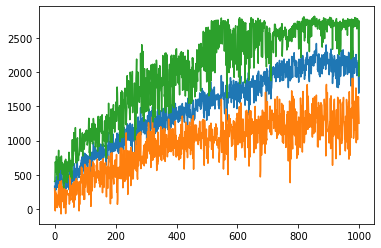

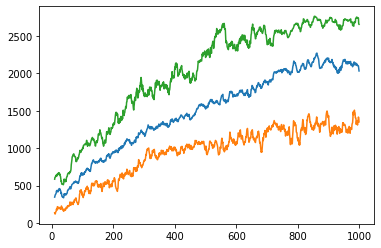

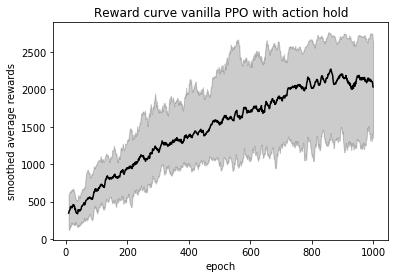

In [2]:
def control(env,q):
    k = np.array([-1000, 1000, -10, -10])
    goal = np.copy(env.state)
    goal[0] -= pi
    return -k.dot(goal)



seeds = [6,7,8,9]
load_paths = ['./data/acrobot_switch4/r3_longer_seed_' + str(seed) for seed in seeds]
#load_paths = ['./data/acrobot/sg_b' + str(seed) for seed in seeds]

avg_rewards = np.zeros((1000,))
rewards = np.zeros((1000,4))

for i, load_path in enumerate(load_paths):
    model, env, args, ws = load_workspace(load_path)
    
    avg_rewards += np.array((ws['avg_reward_hist']))
    rewards[:,i] = np.array((ws['avg_reward_hist']))
    #append(ws['avg_reward_hist'])
    #plt.title('reward vs epoch')
    #plt.figure()
    #plt.plot(ws['a'])
    #plt.figure()
    #plt.plot(ws['p_loss_hist'])
    #plt.figure()
    #plt.plot(ws['v_loss_hist'])
    #print(ws['num_states'])
    
avg_rewards /= 4
min_rewards = [np.min(rewards[i,:]) for i in range(1000)]
max_rewards = [np.max(rewards[i,:]) for i in range(1000)]
plt.plot(avg_rewards)
plt.plot(min_rewards)
plt.plot(max_rewards)

rewards_smoothed = pd.Series(avg_rewards).rolling(10, min_periods=10).mean()
min_smoothed =  pd.Series(min_rewards).rolling(10, min_periods=10).mean()
max_smoothed =  pd.Series(max_rewards).rolling(10, min_periods=10).mean()

plt.figure()
plt.plot(rewards_smoothed)
plt.plot(min_smoothed)
plt.plot(max_smoothed)

plt.figure()

epochs = [t for t in range(1000)]
plt.plot(rewards_smoothed, color='k')
plt.fill_between(epochs, min_smoothed, max_smoothed, color='k',alpha=.2 )
plt.xlabel('epoch')
plt.ylabel('smoothed average rewards')
plt.title('Reward curve vanilla PPO with action hold')

#plt.figure()
#plt.plot(np.array(ws['ep_path_tensor']))

In [3]:
#load_paths = ['./data/acrobot_switch4/cr1_seed_7' + str(seed) for seed in seeds]

model, env = load_model(load_path)
plt.plot(data['eprewmean'])

plt.figure()
plt.plot(data['policy_loss'])

plt.figure()
plt.plot(data['value_loss'])

def control(env,q):
    k = np.array([-1000, 1000, -10, -10])
    goal = np.copy(env.state)
    goal[0] -= pi
    return -k.dot(goal)

seeds = [6,7,8,9]
#load_paths = ['./data/acrobot_switch4/r3_longer_seed_' + str(seed) for seed in seeds]
load_paths = ['./data/acrobot_switched4/baseline_ppo_cr' + str(seed) for seed in seeds]

avg_rewards = np.zeros((148,))
rewards = np.zeros((148,4))

for i, load_path in enumerate(load_paths):
    data = pd.read_csv(load_path + '/progress.csv')
    avg_rewards  += data['eprewmean']
    rewards[:,i] = data['eprewmean']

    #model, env, args, ws = load_workspace(load_path)
    
    #avg_rewards += np.array((ws['avg_reward_hist']))
    #rewards[:,i] = np.array((ws['avg_reward_hist']))
    #append(ws['avg_reward_hist'])
    #plt.title('reward vs epoch')
    #plt.figure()
    #plt.plot(ws['a'])
    #plt.figure()
    #plt.plot(ws['p_loss_hist'])
    #plt.figure()
    #plt.plot(ws['v_loss_hist'])
    #print(ws['num_states'])
    
avg_rewards /= 4
min_rewards = [np.min(rewards[i,:]) for i in range(1000)]
max_rewards = [np.max(rewards[i,:]) for i in range(1000)]
plt.plot(avg_rewards)
plt.plot(min_rewards)
plt.plot(max_rewards)

rewards_smoothed = pd.Series(avg_rewards).rolling(10, min_periods=10).mean()
min_smoothed =  pd.Series(min_rewards).rolling(10, min_periods=10).mean()
max_smoothed =  pd.Series(max_rewards).rolling(10, min_periods=10).mean()

plt.figure()
plt.plot(rewards_smoothed)
plt.plot(min_smoothed)
plt.plot(max_smoothed)

plt.figure()

epochs = [t for t in range(1000)]
plt.plot(rewards_smoothed, color='k')
plt.fill_between(epochs, min_smoothed, max_smoothed, color='k',alpha=.2 )
plt.xlabel('Epoch')
plt.ylabel('Smoothed average rewards')
plt.title('Reward curve switched PPO')

#plt.figure()
#plt.plot(np.array(ws['ep_path_tensor']))

KeyError: 'save_path'

1499
[1781.08391592]


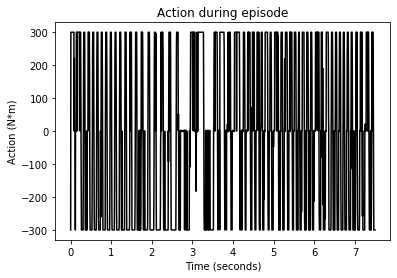

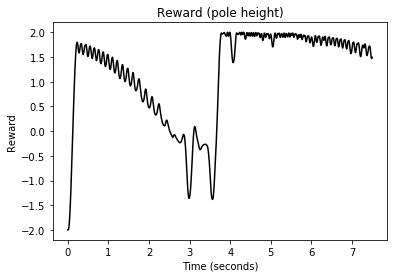

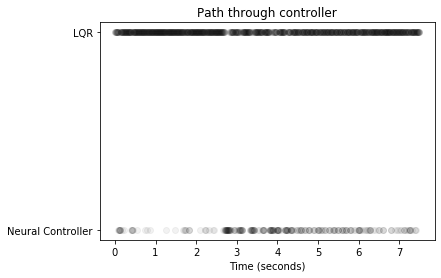

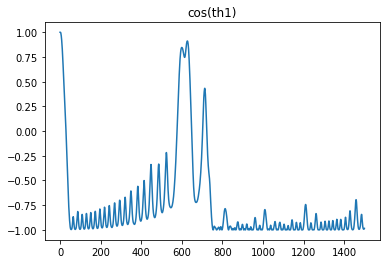

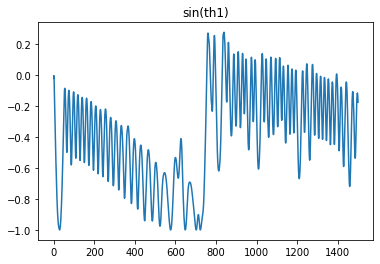

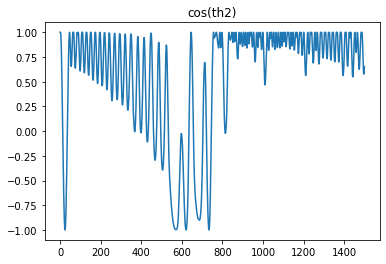

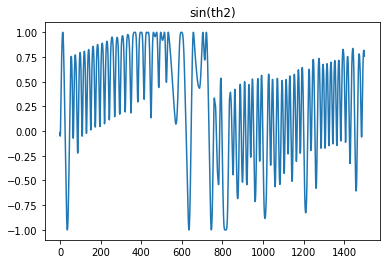

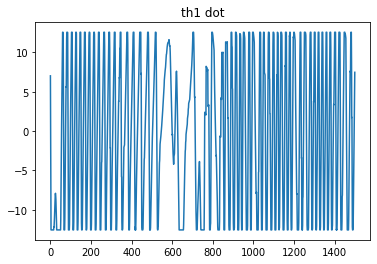

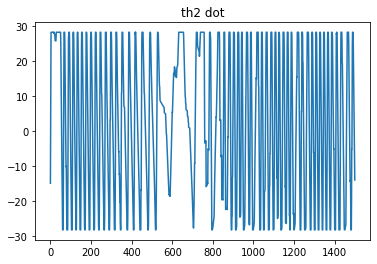

In [22]:
# Acrobot

load_path = './data/acrobot_switch4/r3_long_seed_7'
#model, env, args, ws = load_workspace(load_path)

model.env = env
myenv = env
myenv.num_steps=1500

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))
logp_hist = np.zeros((myenv.num_steps, 1))

#model.action_var = .1
model.action_var = 1
model.gate_var = .2

obs = myenv.reset()

for i in range(myenv.num_steps):
        actions, _, _, logp = model.step(obs)
        actions 
        #actions = np.zeros(1)
        actions = np.clip(actions,-300, 300)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        logp_hist[i,:]   = logp
        #env.render()
        if done:
            break
            
            
gate_hist = [1 if p == 0 else 0 for p in logp_hist]
t = [.005*i for i in range(1500)]
plt.plot(t, action_hist, color='k')
plt.title('Action during episode')
plt.xlabel('Time (seconds)')
plt.ylabel('Action (N*m)')

plt.figure()
plt.plot(t, reward_hist, color='k')
plt.title('Reward (pole height)')
plt.xlabel('Time (seconds)')
plt.ylabel('Reward')

plt.figure()
plt.plot(t, gate_hist, 'o', color='k', alpha=.05)
plt.title('Path through controller')
plt.yticks([0,1],['Neural Controller', 'LQR'])
plt.xlabel('Time (seconds)')

#plt.figure()
#plt.plot(gate_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("cos(th1)")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("sin(th1)")

plt.figure()
plt.plot(state_hist[:,2])
plt.title("cos(th2)")

plt.figure()
plt.plot(state_hist[:,3])
plt.title("sin(th2)")

plt.figure()
plt.plot(state_hist[:,4])
plt.title("th1 dot")

plt.figure()
plt.plot(state_hist[:,5])
plt.title("th2 dot")

print(i)
print(sum(reward_hist))

In [ ]:
# Cartpole

myenv = env
myenv.num_steps=1500

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

obs = env.reset()

for i in range(myenv.num_steps):
        actions, _, _, _ = model.step(obs)
        #actions = np.zeros(1)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break

plt.plot(action_hist)
plt.figure()
plt.plot(reward_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")


print(i)
print(sum(reward_hist))

In [4]:
def control(env, q):
    k1 = 140.560
    k2 = -3.162*.1
    k3 = 41.772
    k4 = 0#-8.314
    u = -4*(k1 * (q[0] - pi) + k2 * q[1] + k3 * q[2] + k4 * q[3])
    return u

myenv = env
myenv.num_steps=2000

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))
path_hist = np.zeros((myenv.num_steps,1))

obs = env.reset()
#env.state[0] = np.pi
model.hyst_state = 0

for i in range(myenv.num_steps):
        if ((155 * pi/180 < obs[0] < 220 * pi/180)):
            actions = np.array(control(env, obs))/50
            #actions = np.zeros(1)
            path_hist[i]  = 1
        
        else:
            actions, _, _, _ = model.step(obs)
            path_hist[i] = 0
            
        
        actions = np.clip(actions, -75, 75)
        #actions = np.zeros(1)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break

plt.plot(action_hist)
plt.title('action')


plt.figure()
plt.plot(path_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")

print(i)
print(sum(reward_hist))

NameError: name 'env' is not defined

In [ ]:
env.state[0] = np.pi
env.state[1] = 1
env.render()

In [ ]:
-(np.cos(env.state[0]) + np.cos(env.state[0] + env.state[1]))

In [ ]:
np.cos(env.state[0])

In [ ]:
np.cos(env.state[1])

In [ ]:
env.action_space.high

In [ ]:
pprint(list(ws.keys()))

In [ ]:
action_hist

In [ ]:
model.policy.state_dict()

Text(0, 0.5, 'Output')

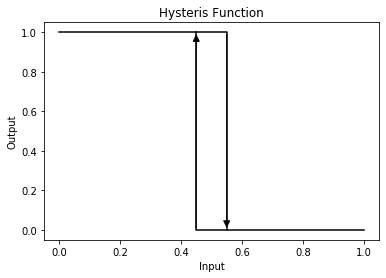

In [164]:
plt.figure()

x = [ 0, .55 , .55]
y = [1, 1 ,0]

x2 = [1, .45, .45]
y2 = [0, 0, 1]

l = plt.plot(x,y,color='k')[0]
add_arrow(l)
#add_arrow(l,position=0)


l2 = plt.plot(x2,y2,color='k')[0]
add_arrow(l2)

plt.title('Hysteris Function')
plt.xlabel('Input')
plt.ylabel('Output')
#add_arrow(l2,pos

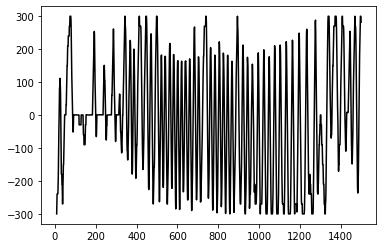

In [12]:
smooth_action = pd.Series(action_hist.reshape(-1)).rolling(10, min_periods=10).mean()
plt.plot(smooth_action, color='k')

In [7]:
action_hist.reshape(-1)

array([-300.        , -300.        , -300.        , ...,  300.        ,
        300.        ,  117.48684933])